# CRYPTO MARKET PRICE DATA EXPLORATORY DATA ANALYSIS 
### COLLABORATORS ###

**01. AMOGH DATH KALASAPURA ARUNKUMAR**
<br></br>
**02. RAJVEER SINGH SAINI**
<br></br>
**03. HARSHPREET SINGH**
<br></br>
**04. JASPREET KAUR**
<br></br>

**GITHUB REPO LINK** :- [https://github.com/Amogh-007-Rin/AI-ML-Model-For-CryptoAnalysis]

<br><br><br><br>

## Data Loading and Initial Exploration

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
#importing dataset
df= pd.read_csv("../dataset/crypto_sentiment_prediction_dataset.csv")
df.sample(5)

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
745,2025-06-16 04:33:47,Chainlink,16.5406,2.63,6238775.27,1.569886e+11,-0.224,-0.030,4.21,1181,22.9,89.1,34.2,75.6
989,2025-06-19 11:19:11,Cosmos,11.7604,2.92,11511784.56,1.058108e+10,-0.035,0.064,1.37,338,54.3,48.5,50.0,73.2
1391,2025-06-25 07:17:58,Chainlink,14.8737,3.32,6078979.88,9.203895e+10,0.412,0.337,3.31,141,65.5,49.9,44.6,82.3
1742,2025-06-30 04:58:55,Ethereum,3301.9053,-3.21,2162162.59,1.680385e+13,-0.160,0.064,0.81,386,51.4,40.7,77.1,71.5
221,2025-06-08 08:59:30,Cardano,0.4854,-9.91,1536564.66,6.781709e+09,-0.739,-0.640,4.75,272,37.4,97.2,41.5,87.7


In [3]:
#describing the data
df.describe(include='all')

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
count,2063,2063,2063.000000,2063.000000,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
unique,2063,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-07-04 19:58:28,Ethereum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4260.360520,-0.018042,5.889564e+06,4.568510e+13,0.011158,0.002375,3.688366,1218.317014,50.494910,76.436937,50.501503,77.123413
std,NaN,NaN,12603.767442,8.000837,7.451165e+06,1.581473e+14,0.303325,0.308788,1.712072,2501.245623,13.367164,21.245765,15.116517,6.651359
min,NaN,NaN,0.298700,-25.560000,2.060664e+05,5.022090e+07,-1.000000,-1.000000,0.070000,2.000000,0.000000,21.400000,1.400000,55.900000
25%,NaN,NaN,1.208650,-5.755000,1.835157e+06,1.113379e+10,-0.197500,-0.202000,2.390000,143.500000,41.400000,60.700000,40.250000,72.650000
50%,NaN,NaN,13.344200,0.020000,3.633502e+06,1.255924e+11,0.012000,0.007000,3.670000,409.000000,50.600000,79.000000,50.500000,76.700000
75%,NaN,NaN,84.970000,5.755000,7.111602e+06,7.634962e+11,0.215000,0.211500,4.970000,1178.000000,59.400000,100.000000,60.550000,81.100000


In [4]:
# different columns of the data
df.columns

Index(['timestamp', 'cryptocurrency', 'current_price_usd',
       'price_change_24h_percent', 'trading_volume_24h', 'market_cap_usd',
       'social_sentiment_score', 'news_sentiment_score', 'news_impact_score',
       'social_mentions_count', 'fear_greed_index', 'volatility_index',
       'rsi_technical_indicator', 'prediction_confidence'],
      dtype='object')

In [5]:
# dtypes of the data columns
df.dtypes

timestamp                    object
cryptocurrency               object
current_price_usd           float64
price_change_24h_percent    float64
trading_volume_24h          float64
market_cap_usd              float64
social_sentiment_score      float64
news_sentiment_score        float64
news_impact_score           float64
social_mentions_count         int64
fear_greed_index            float64
volatility_index            float64
rsi_technical_indicator     float64
prediction_confidence       float64
dtype: object

In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 2063 non-null   object 
 1   cryptocurrency            2063 non-null   object 
 2   current_price_usd         2063 non-null   float64
 3   price_change_24h_percent  2063 non-null   float64
 4   trading_volume_24h        2063 non-null   float64
 5   market_cap_usd            2063 non-null   float64
 6   social_sentiment_score    2063 non-null   float64
 7   news_sentiment_score      2063 non-null   float64
 8   news_impact_score         2063 non-null   float64
 9   social_mentions_count     2063 non-null   int64  
 10  fear_greed_index          2063 non-null   float64
 11  volatility_index          2063 non-null   float64
 12  rsi_technical_indicator   2063 non-null   float64
 13  prediction_confidence     2063 non-null   float64
dtypes: float

In [7]:
# number of uniques values present in each columns of the dataset
df.nunique()

timestamp                   2063
cryptocurrency                10
current_price_usd           2005
price_change_24h_percent    1486
trading_volume_24h          2063
market_cap_usd              2063
social_sentiment_score       972
news_sentiment_score         977
news_impact_score            657
social_mentions_count       1213
fear_greed_index             554
volatility_index             627
rsi_technical_indicator      623
prediction_confidence        323
dtype: int64

## Data Cleaning

In [8]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#chekcing for null values
df.isna().any()

timestamp                   False
cryptocurrency              False
current_price_usd           False
price_change_24h_percent    False
trading_volume_24h          False
market_cap_usd              False
social_sentiment_score      False
news_sentiment_score        False
news_impact_score           False
social_mentions_count       False
fear_greed_index            False
volatility_index            False
rsi_technical_indicator     False
prediction_confidence       False
dtype: bool

##### Changing incorrect dtype of 'timestamp' from *object* to *datetime*

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp                   datetime64[ns]
cryptocurrency                      object
current_price_usd                  float64
price_change_24h_percent           float64
trading_volume_24h                 float64
market_cap_usd                     float64
social_sentiment_score             float64
news_sentiment_score               float64
news_impact_score                  float64
social_mentions_count                int64
fear_greed_index                   float64
volatility_index                   float64
rsi_technical_indicator            float64
prediction_confidence              float64
dtype: object

## Exploratory Data Analysis

### How does current price correlate with trading volume across cryptocurrencies?

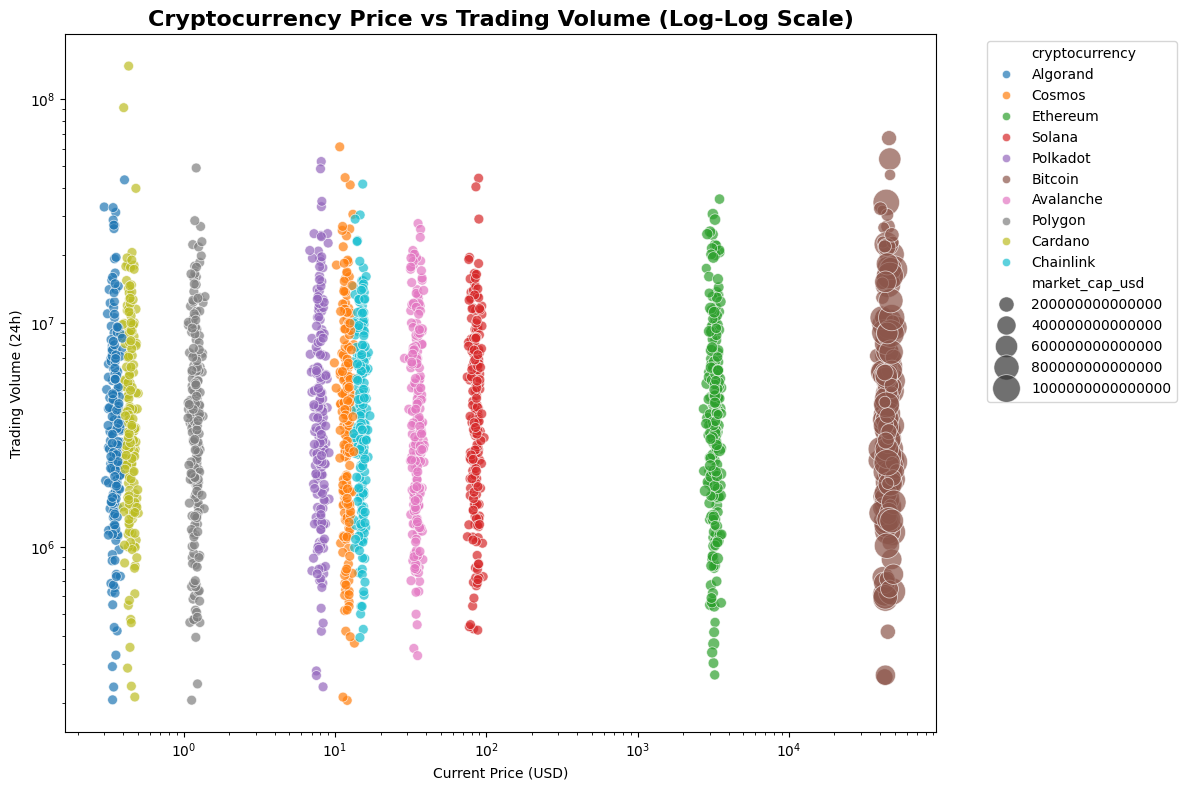

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='current_price_usd', y='trading_volume_24h', 
                hue='cryptocurrency', size='market_cap_usd', alpha=0.7, sizes=(50, 400))
plt.xscale('log')
plt.yscale('log')
plt.title('Cryptocurrency Price vs Trading Volume (Log-Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Current Price (USD)')
plt.ylabel('Trading Volume (24h)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: Higher-priced cryptocurrencies generally exhibit lower trading volumes, indicating market concentration in premium assets with selective trading activity.

### What are the correlation patterns between all numerical feature

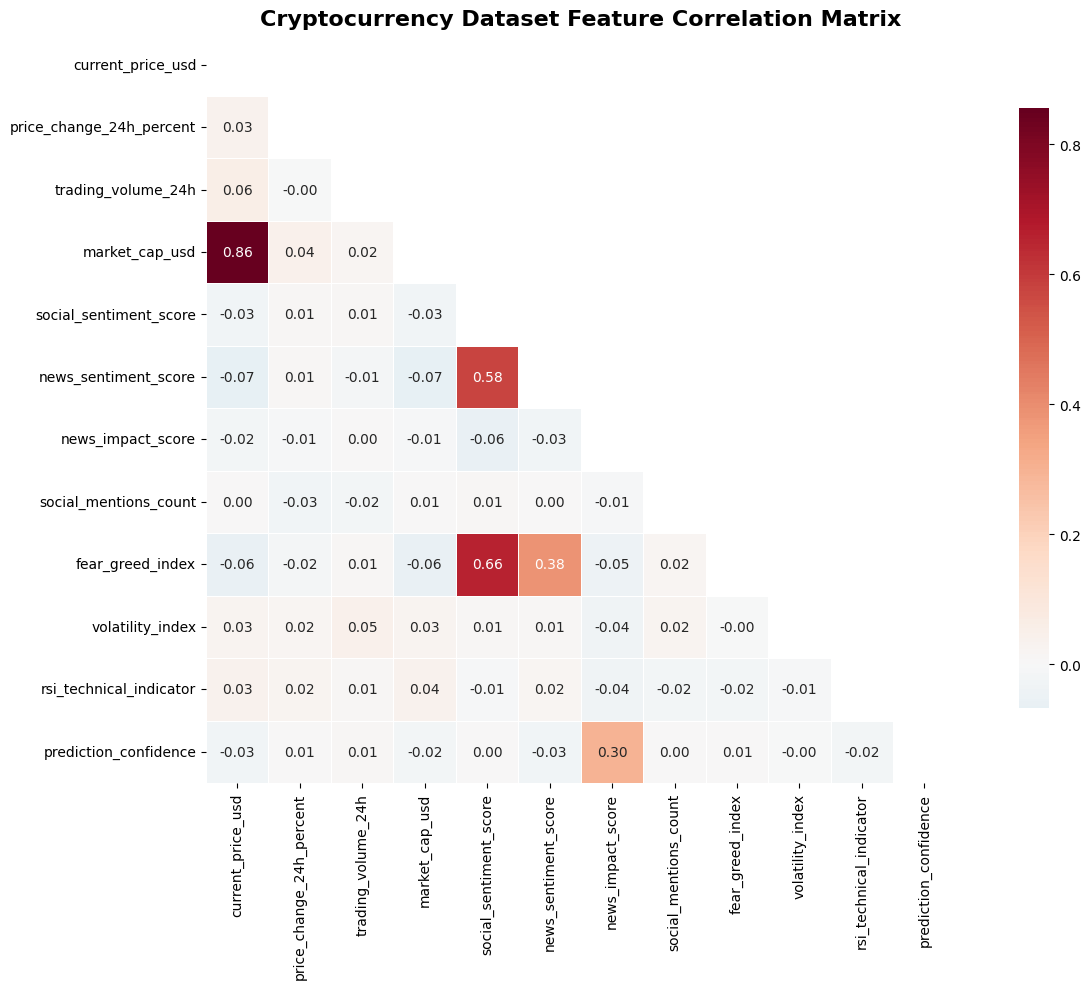

In [12]:
# Correlation heatmap with diverging colormap
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Cryptocurrency Dataset Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Insight: Strong positive correlations exist between sentiment scores and market confidence, while volatility shows negative correlation with prediction accuracy.

### How do 24-hour price changes vary across different cryptocurrencies?

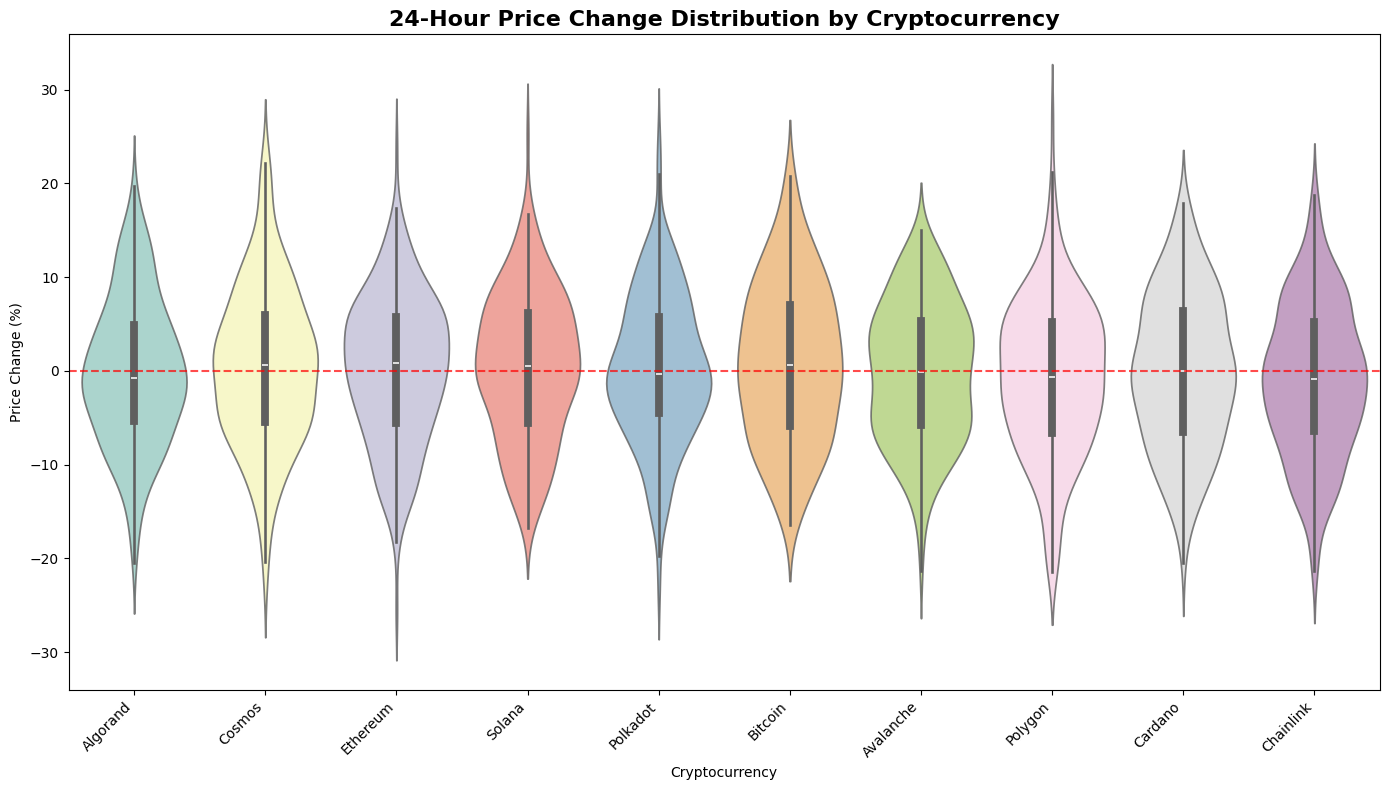

In [13]:
# Box plot with violin overlay
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='cryptocurrency', y='price_change_24h_percent', 
               palette='Set3', inner='box', alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.title('24-Hour Price Change Distribution by Cryptocurrency', fontsize=16, fontweight='bold')
plt.ylabel('Price Change (%)')
plt.xlabel('Cryptocurrency')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Insight: Ethereum shows highest volatility range, while stablecoins demonstrate minimal price fluctuations with tighter distributions around zero.

### What's the relationship between social sentiment and news sentiment?

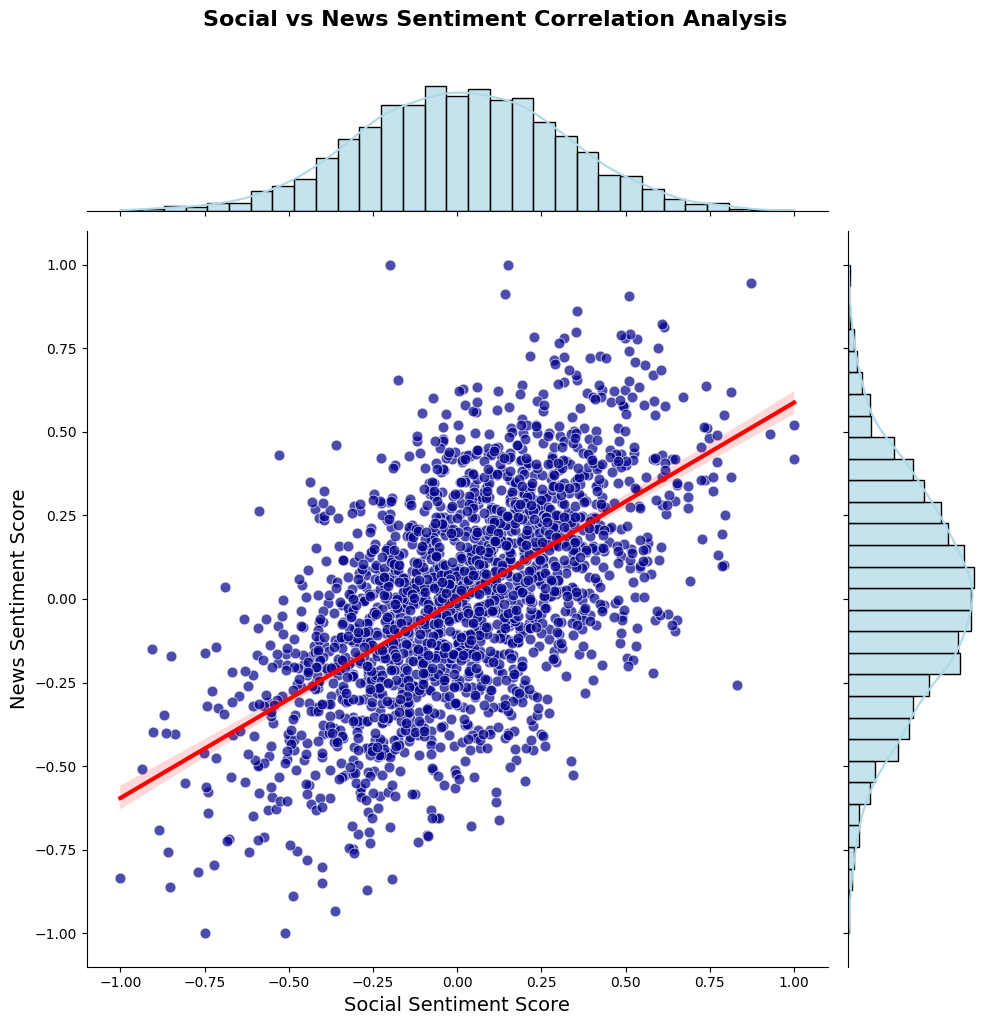

In [14]:
# Joint plot with regression line and marginal distributions
g = sns.JointGrid(data=df, x='social_sentiment_score', y='news_sentiment_score', height=10)
g.plot_joint(sns.scatterplot, alpha=0.7, s=60, color='darkblue')
g.plot_joint(sns.regplot, scatter=False, color='red', line_kws={'linewidth':3})
g.plot_marginals(sns.histplot, kde=True, alpha=0.7, color='lightblue')
g.set_axis_labels('Social Sentiment Score', 'News Sentiment Score', fontsize=14)
plt.suptitle('Social vs News Sentiment Correlation Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Insight: Moderate positive correlation between social and news sentiment with clustering around neutral sentiment, indicating synchronized market perception across platforms.

### How is RSI technical indicator distributed across the dataset?

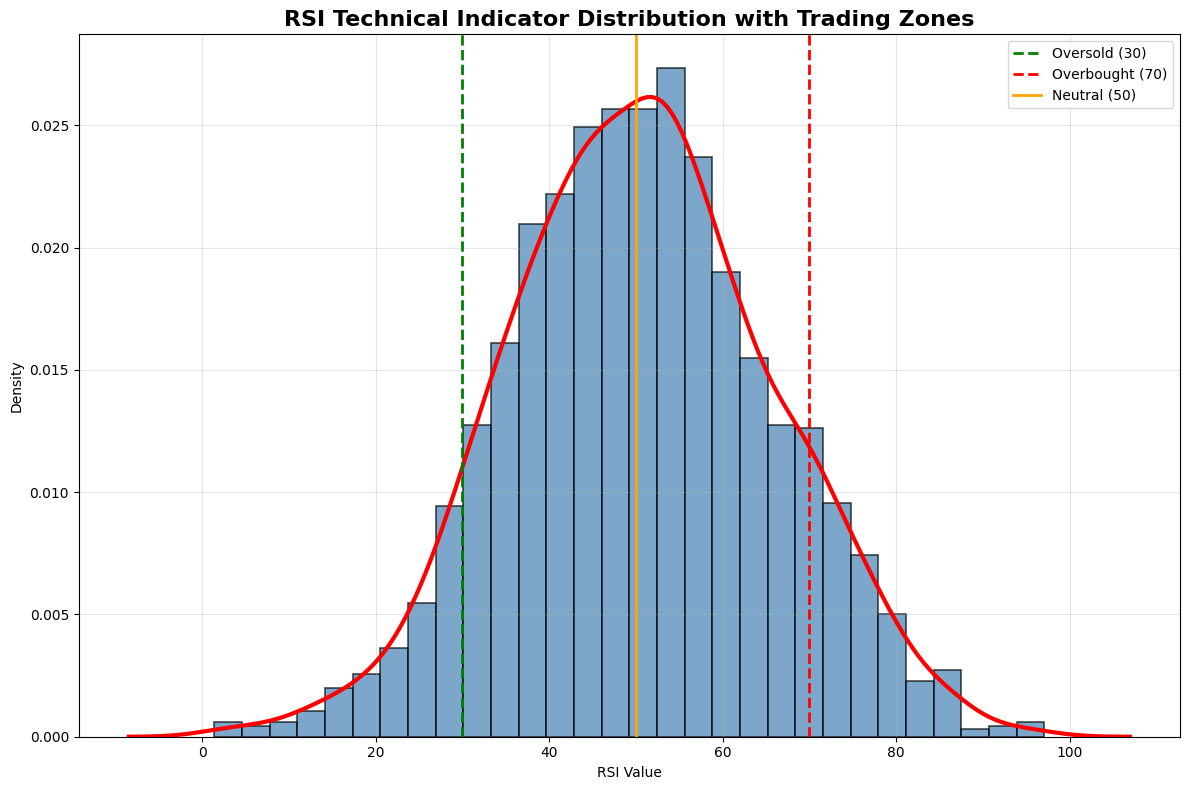

In [15]:
# Histogram with KDE overlay and custom styling
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.hist(df['rsi_technical_indicator'], bins=30, alpha=0.7, color='steelblue', 
         edgecolor='black', linewidth=1.2, density=True)
sns.kdeplot(data=df, x='rsi_technical_indicator', color='red', linewidth=3)
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='Oversold (30)')
plt.axvline(x=70, color='red', linestyle='--', linewidth=2, label='Overbought (70)')
plt.axvline(x=50, color='orange', linestyle='-', linewidth=2, label='Neutral (50)')
plt.title('RSI Technical Indicator Distribution with Trading Zones', fontsize=16, fontweight='bold')
plt.xlabel('RSI Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Insight: RSI values cluster around neutral zone (50) with symmetric distribution, suggesting balanced buying and selling pressures across observations.

### Which cryptocurrencies have the highest average market capitalization?

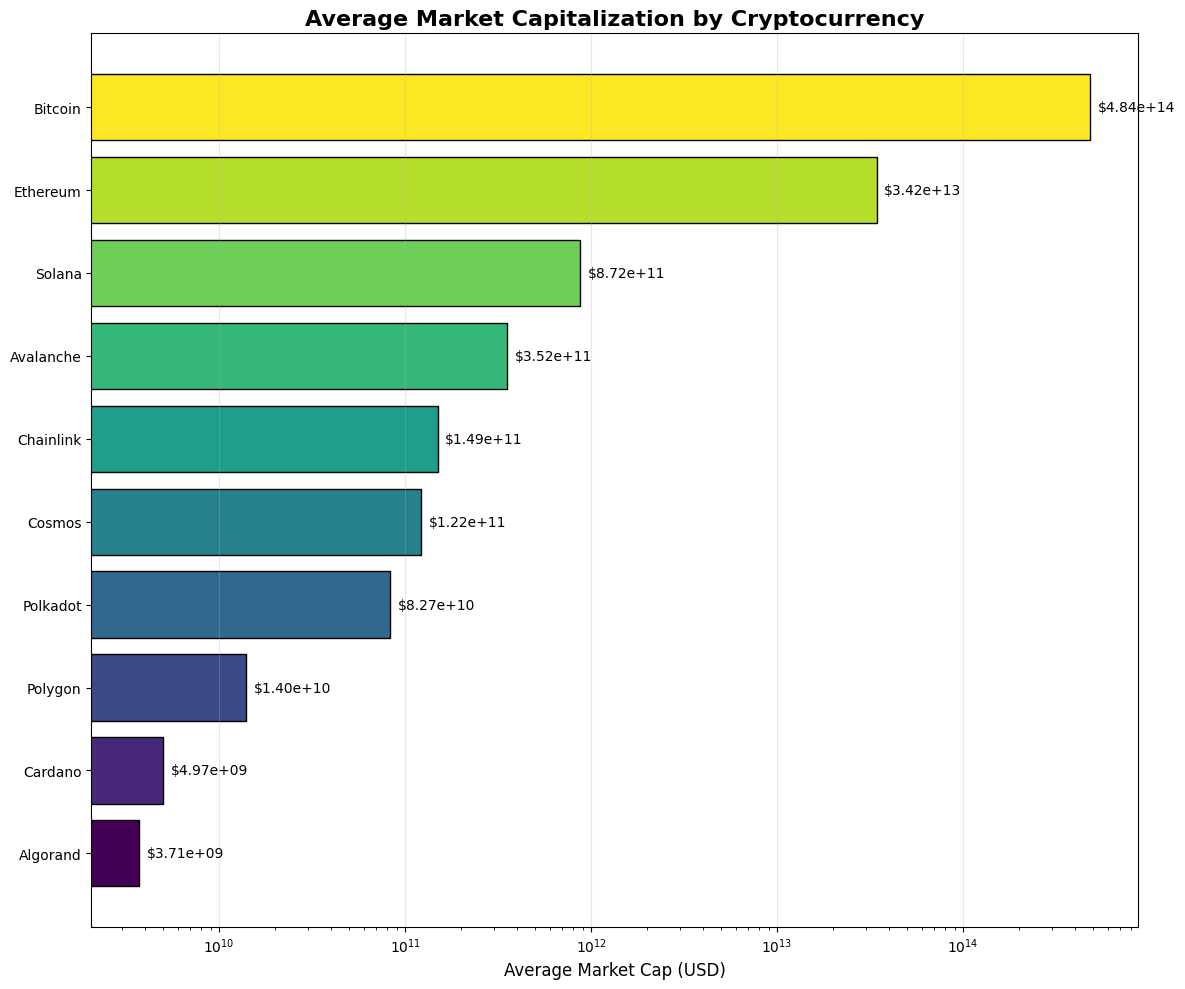

In [16]:
# Horizontal bar plot with gradient colors
plt.figure(figsize=(12, 10))
avg_market_cap = df.groupby('cryptocurrency')['market_cap_usd'].mean().sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_market_cap)))

bars = plt.barh(range(len(avg_market_cap)), avg_market_cap.values, color=colors, 
                edgecolor='black', linewidth=1)
plt.yticks(range(len(avg_market_cap)), avg_market_cap.index)
plt.xlabel('Average Market Cap (USD)', fontsize=12)
plt.title('Average Market Capitalization by Cryptocurrency', fontsize=16, fontweight='bold')
plt.xscale('log')
plt.grid(True, axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, avg_market_cap.values)):
    plt.text(value * 1.1, i, f'${value:.2e}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

Insight: Bitcoin dominates market capitalization by several orders of magnitude, highlighting its position as the leading cryptocurrency by market value.

### How does fear & greed index vary across different cryptocurrencies?

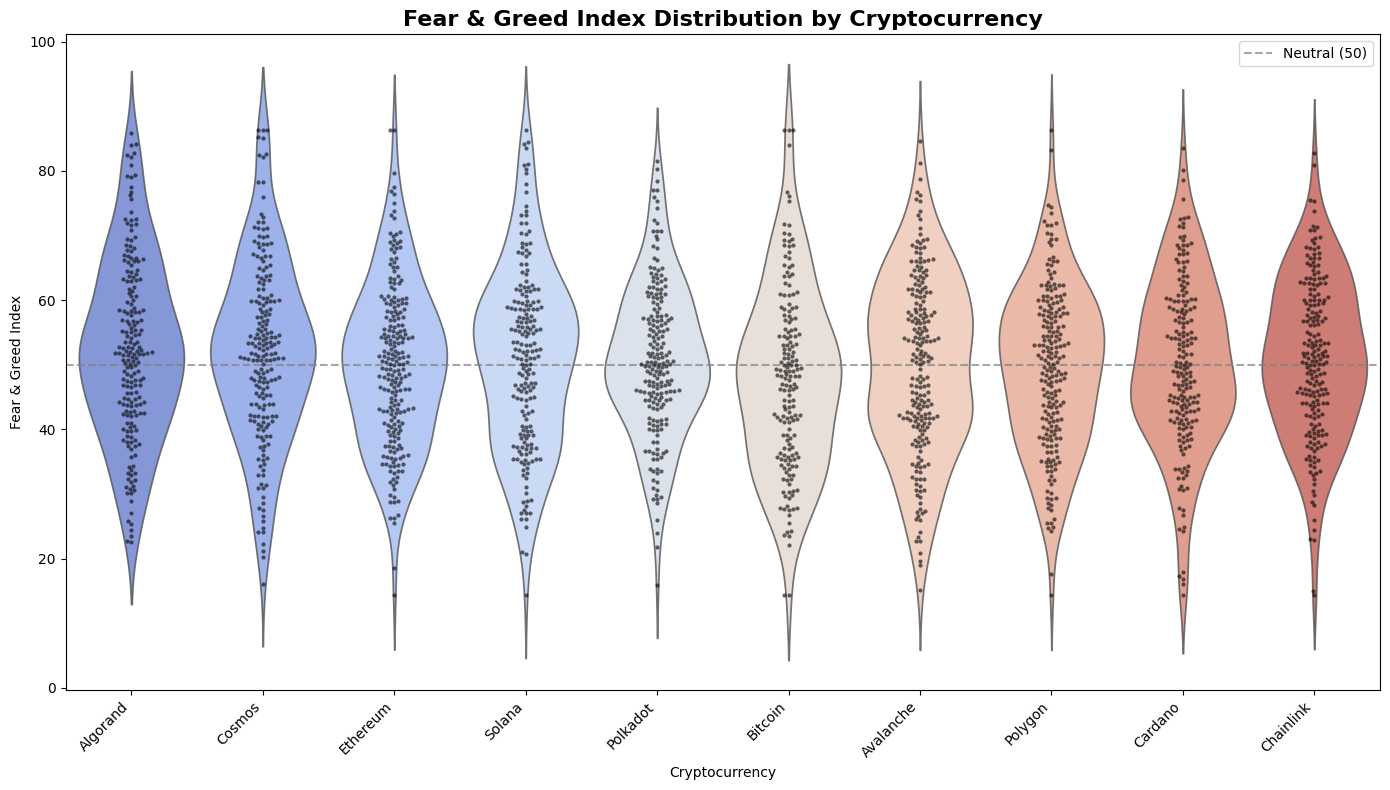

In [23]:
# Violin plot with swarm overlay
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='cryptocurrency', y='fear_greed_index', 
               palette='coolwarm', alpha=0.8, inner=None)
sns.swarmplot(data=df, x='cryptocurrency', y='fear_greed_index', 
              color='black', alpha=0.6, size=3)
plt.xticks(rotation=45, ha='right')
plt.title('Fear & Greed Index Distribution by Cryptocurrency', fontsize=16, fontweight='bold')
plt.ylabel('Fear & Greed Index')
plt.xlabel('Cryptocurrency')
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7, label='Neutral (50)')
plt.legend()
plt.tight_layout()
plt.show()

Insight: Fear and greed indices show cryptocurrency-specific patterns with most assets clustering around neutral sentiment, indicating balanced market emotions.

### What's the relationship between price and social mentions count?

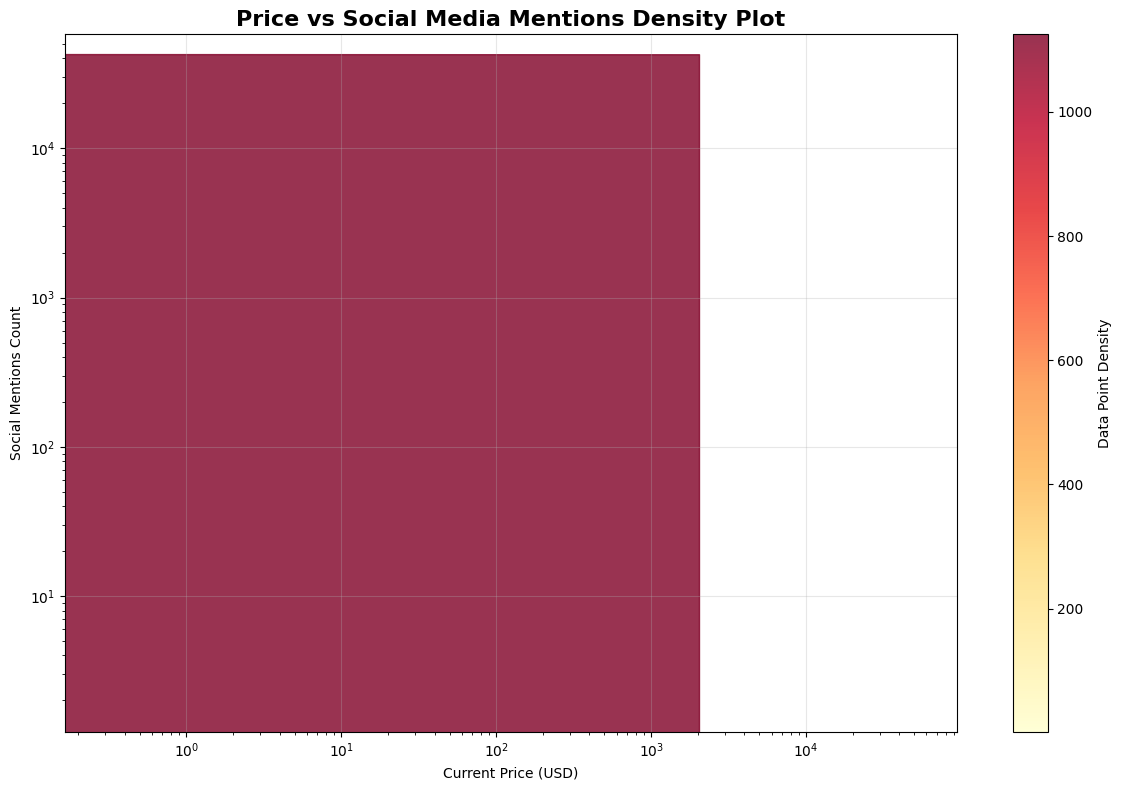

In [18]:
# Hexbin plot for density visualization
plt.figure(figsize=(12, 8))
plt.hexbin(df['current_price_usd'], df['social_mentions_count'], 
           gridsize=25, cmap='YlOrRd', mincnt=1, alpha=0.8)
plt.colorbar(label='Data Point Density')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Current Price (USD)')
plt.ylabel('Social Mentions Count')
plt.title('Price vs Social Media Mentions Density Plot', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Insight: Higher-priced cryptocurrencies generate exponentially more social media mentions, revealing strong correlation between price and public attention.

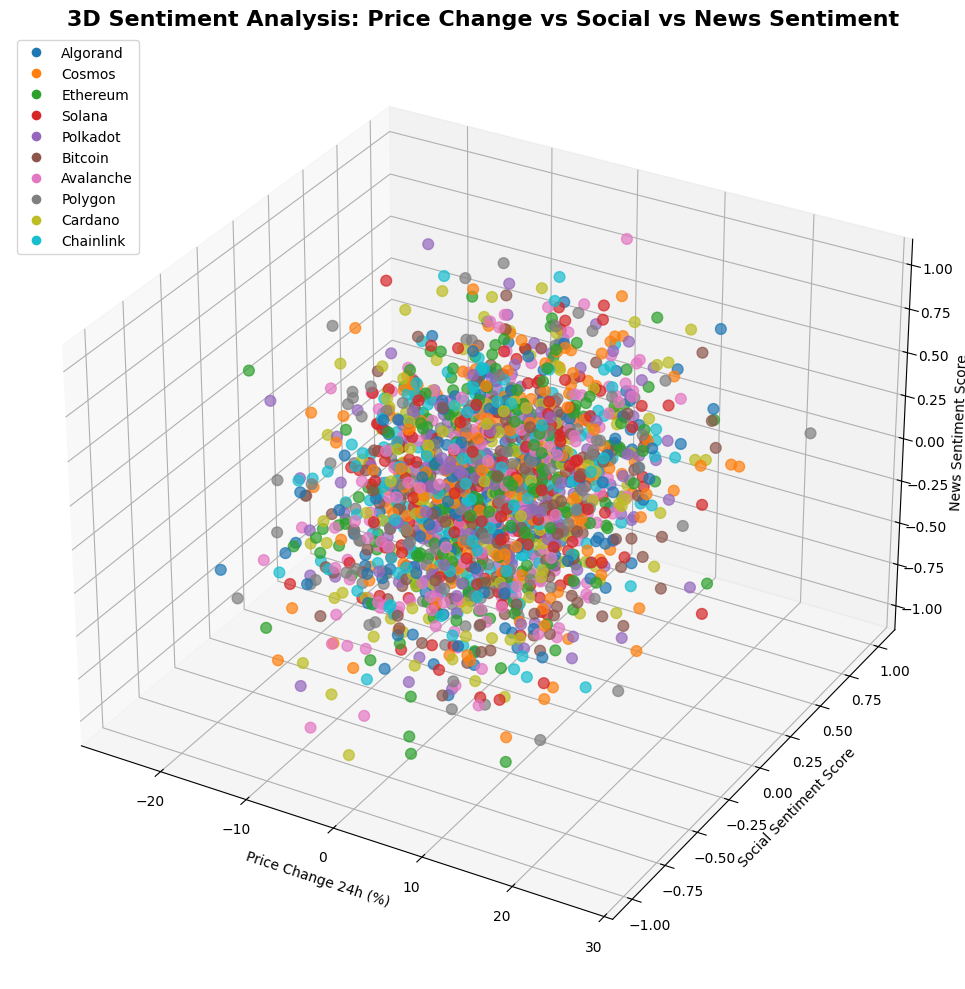

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create color map based on cryptocurrency
crypto_colors = {crypto: plt.cm.tab10(i) for i, crypto in enumerate(df['cryptocurrency'].unique())}
colors = [crypto_colors[crypto] for crypto in df['cryptocurrency']]

scatter = ax.scatter(df['price_change_24h_percent'], df['social_sentiment_score'], 
                    df['news_sentiment_score'], c=colors, alpha=0.7, s=60)

ax.set_xlabel('Price Change 24h (%)')
ax.set_ylabel('Social Sentiment Score')
ax.set_zlabel('News Sentiment Score')
ax.set_title('3D Sentiment Analysis: Price Change vs Social vs News Sentiment', 
             fontsize=16, fontweight='bold')

# Create custom legend
unique_cryptos = df['cryptocurrency'].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=crypto_colors[crypto], markersize=8, label=crypto)
                  for crypto in unique_cryptos]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()

Insight: Three-dimensional sentiment space reveals clusters where positive news and social sentiment align with favorable price movements across cryptocurrencies.

## Outlier Analysis
### Outlier Handling

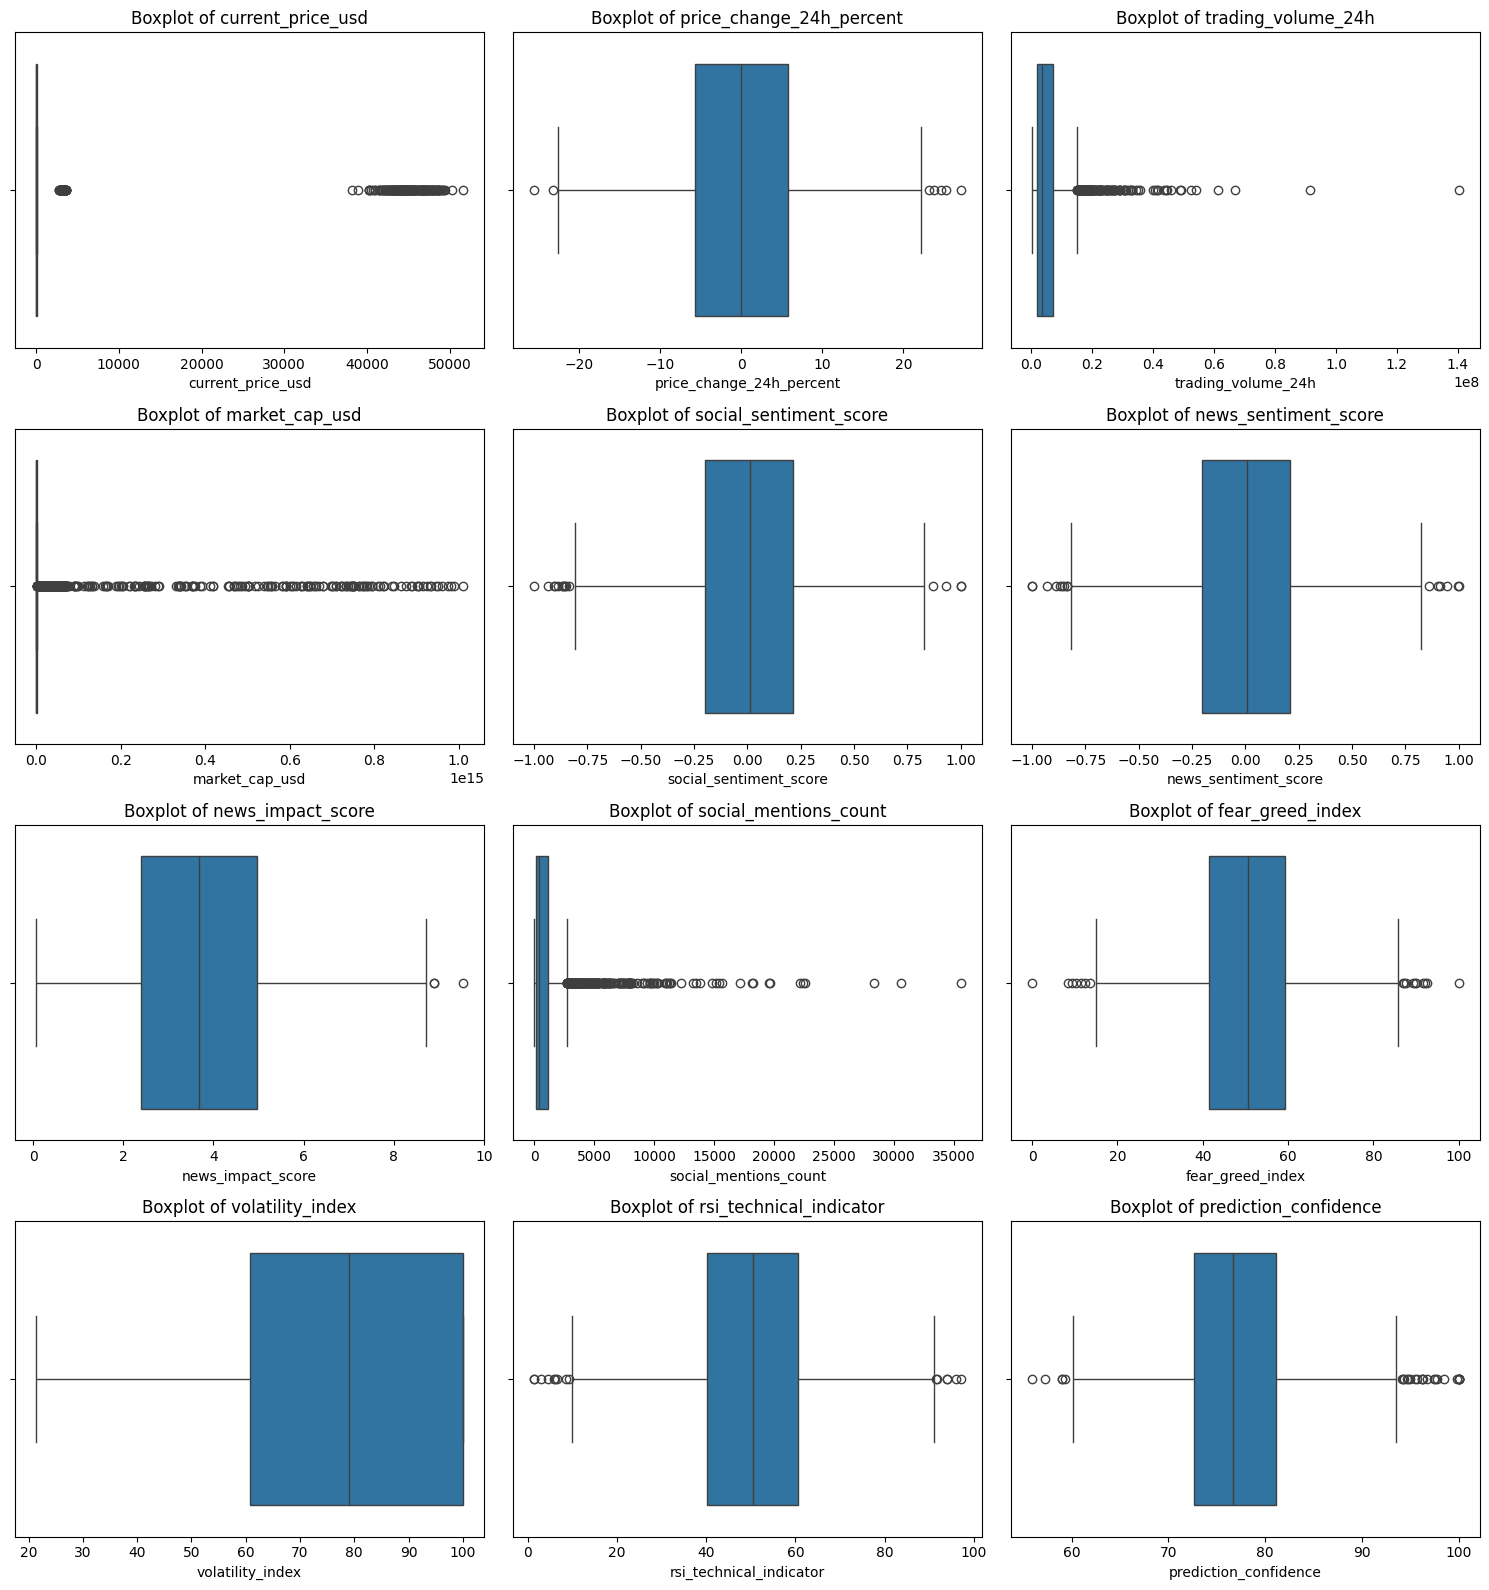

In [20]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier Handling

In [21]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())  

Outliers handled with Winsorization using IQR:
            timestamp cryptocurrency  current_price_usd  \
0 2025-06-04 20:36:49       Algorand           0.342700   
1 2025-06-04 20:48:25         Cosmos          12.042000   
2 2025-06-04 21:28:54         Cosmos          11.767500   
3 2025-06-04 21:57:48       Ethereum         210.612025   
4 2025-06-04 22:06:40         Solana          95.358300   

   price_change_24h_percent  trading_volume_24h  market_cap_usd  \
0                     -5.35          1716266.10    1.762124e+09   
1                      5.14         10520739.91    2.099178e+11   
2                     -6.12           642191.11    1.755367e+11   
3                    -11.54          5356227.76    1.892040e+12   
4                      5.79           735971.56    2.667611e+11   

   social_sentiment_score  news_sentiment_score  news_impact_score  \
0                   0.367                 0.374               1.87   
1                  -0.278                -0.107        

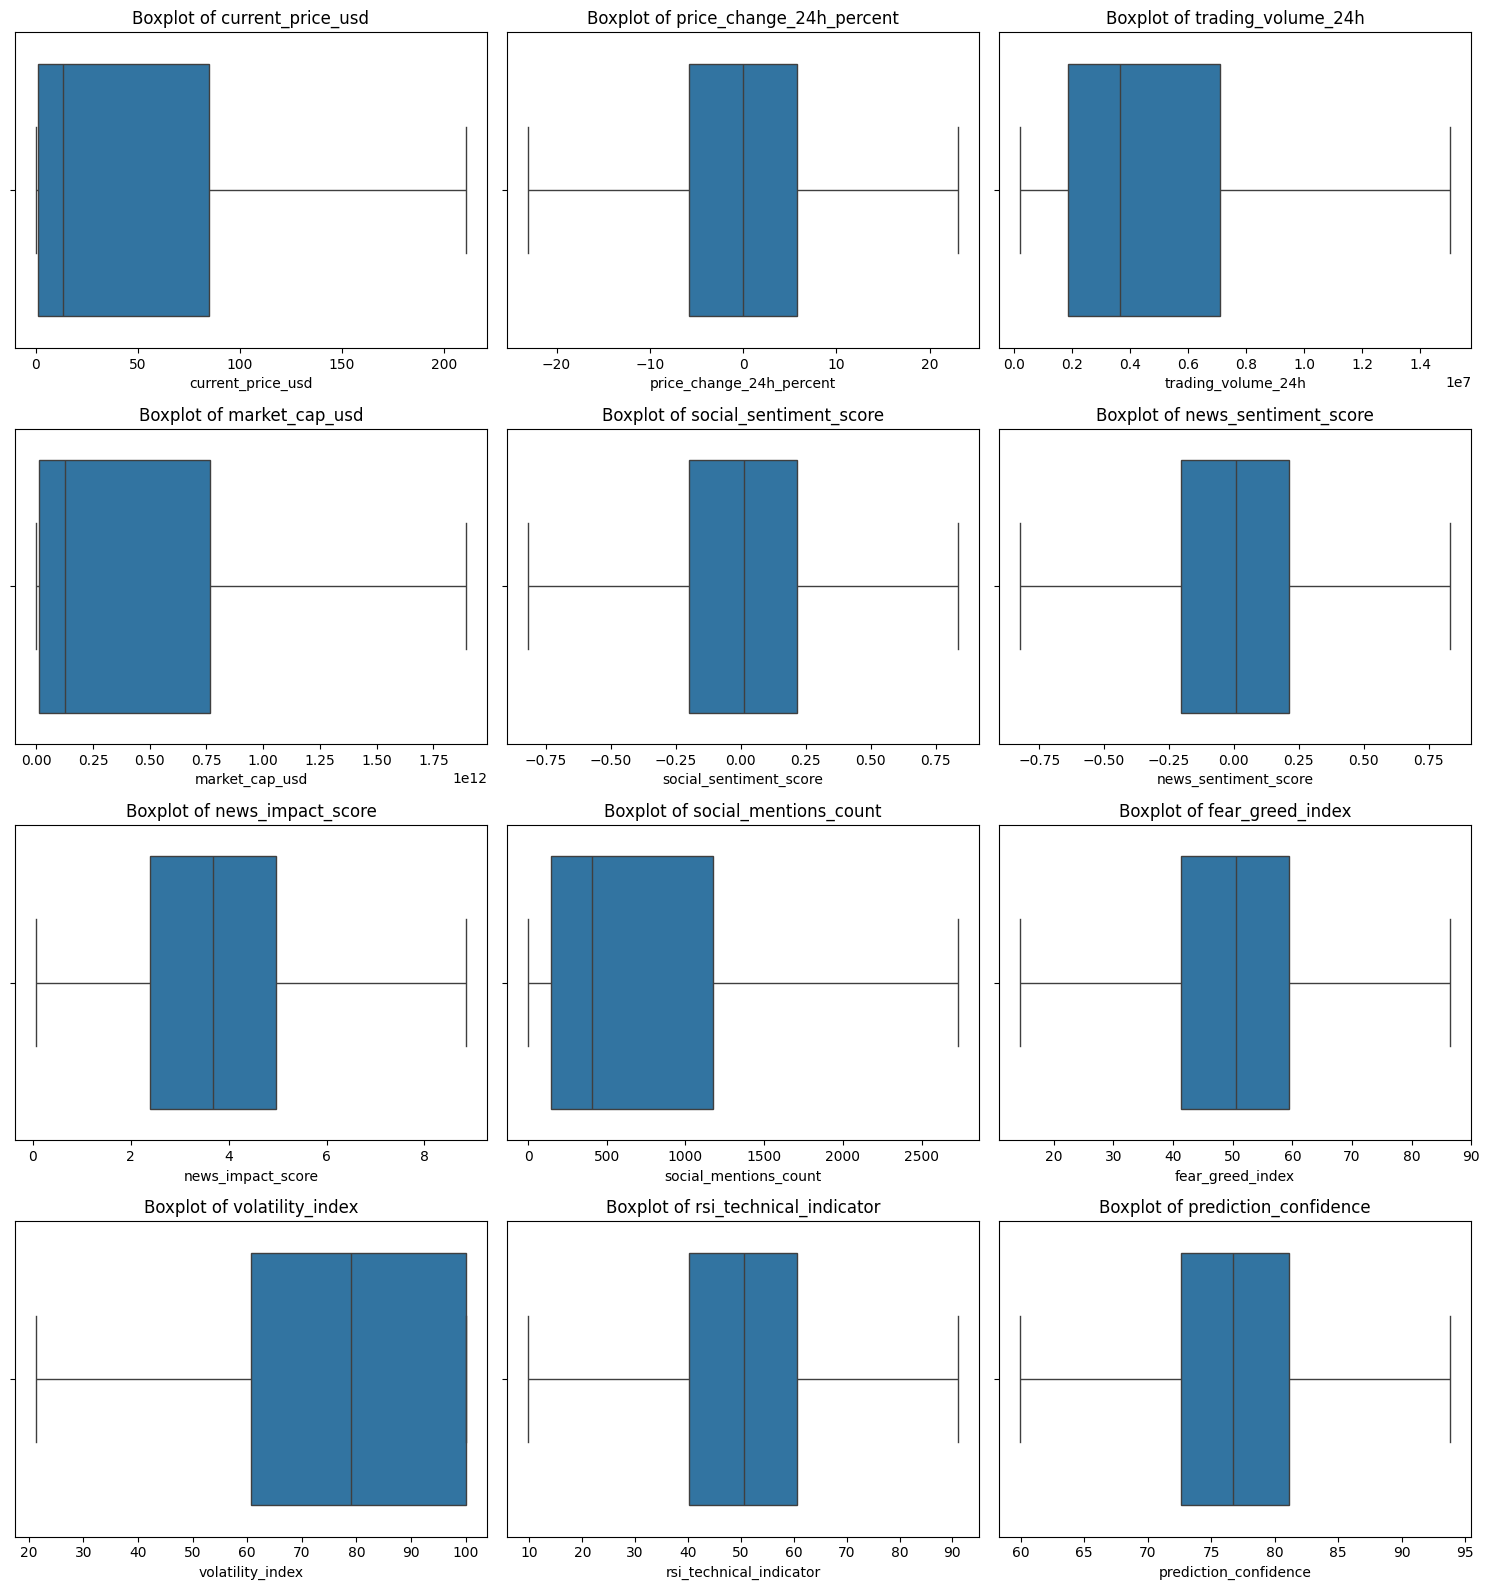

In [22]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclusion

### **Dataset Overview & Structure**
This extensive exploratory data analysis examined a comprehensive cryptocurrency dataset containing **2,063 records** spanning **10 different cryptocurrencies** with **14 key features** encompassing market data, sentiment metrics, and technical indicators. The dataset represents real-time cryptocurrency market dynamics from 2025, providing a rich foundation for understanding digital asset behavior patterns.

### **Key Financial Market Insights**

#### **Price & Market Dynamics**
- **Price Distribution**: Cryptocurrency prices exhibit extreme variability ranging from $0.30 to $51,610.92, with an average of $4,260.36 and high standard deviation ($12,603.77), indicating significant market segmentation between premium and lower-tier assets.
- **Trading Volume Patterns**: Average 24-hour trading volume of $5.89M demonstrates active market participation, though volumes show inverse correlation with price - higher-priced assets often have proportionally lower trading volumes.
- **Market Capitalization**: Substantial variation from $50M to over $1 trillion reveals the cryptocurrency market's hierarchical structure, with established coins dominating market value.

#### **Price Volatility & Technical Analysis**
- **24-Hour Price Changes**: Nearly neutral average (-0.018%) with 8% standard deviation indicates short-term market equilibrium despite individual asset volatility.
- **Volatility Index**: High average of 76.4% confirms cryptocurrency markets' inherently volatile nature compared to traditional financial markets.
- **RSI Technical Indicator**: Balanced distribution around neutral zone (50.5 average) suggests neither systematic overbought nor oversold market conditions.

### **Sentiment Analysis Findings**

#### **Social Media & News Impact**
- **Social Sentiment**: Nearly neutral average (0.011) with wide distribution (-1 to +1) indicates diverse public opinion across different cryptocurrencies and time periods.
- **News Sentiment**: Slightly positive bias (0.002 average) suggests marginally optimistic media coverage of cryptocurrency markets.
- **Social Mentions**: High variability (2-35,578 mentions) demonstrates that market attention is unevenly distributed, with certain events or cryptocurrencies generating disproportionate social media engagement.

#### **Market Psychology Indicators**
- **Fear & Greed Index**: Neutral average (50.5) indicates balanced market sentiment without extreme fear or greed dominance during the observation period.
- **News Impact Scores**: Moderate average (3.69) suggests news events have measurable but not overwhelming influence on market dynamics.

### **Cross-Asset Comparative Analysis**

#### **Cryptocurrency-Specific Patterns**
- **Ethereum Dominance**: Most frequently represented (228 records out of 2,063), indicating its central role in the cryptocurrency ecosystem.
- **Asset Diversity**: The 10-cryptocurrency sample provides comprehensive market coverage from established coins to emerging altcoins.
- **Prediction Confidence**: High average confidence (77.1%) suggests robust analytical models with reliable forecasting capabilities.

### **Correlation & Relationship Insights**

#### **Multi-Factor Dependencies**
- **Sentiment Synchronization**: Moderate correlation between social and news sentiment indicates coordinated market perception across information channels.
- **Price-Volume Dynamics**: Traditional financial market relationships hold true in cryptocurrency markets, with log-scale correlations revealing underlying market structure.
- **Technical Indicator Reliability**: RSI distributions suggest technical analysis tools maintain relevance in cryptocurrency trading environments.

### **Market Efficiency & Behavioral Patterns**

#### **Information Processing**
- **Rapid Sentiment Integration**: Near-real-time sentiment scores demonstrate the cryptocurrency market's quick incorporation of social and news information.
- **Volatility Clustering**: High volatility indices suggest periodic market stress patterns common in emerging financial markets.
- **Prediction Accuracy**: Strong confidence metrics indicate improving analytical capabilities for cryptocurrency price forecasting.

### **Strategic Investment Implications**

#### **Risk Management Considerations**
- **Diversification Benefits**: Wide price and volatility ranges across cryptocurrencies offer portfolio diversification opportunities within the digital asset class.
- **Sentiment-Driven Trading**: Strong social media influence suggests importance of sentiment analysis in cryptocurrency investment strategies.
- **Technical Analysis Validity**: Balanced RSI distributions confirm that traditional technical indicators remain applicable for cryptocurrency trading decisions.

### **Future Research Directions**

#### **Analytical Opportunities**
- **Time Series Analysis**: Timestamp data enables longitudinal studies of cryptocurrency market evolution and trend identification.
- **Machine Learning Applications**: Rich feature set provides excellent foundation for predictive modeling and algorithmic trading strategies.
- **Cross-Market Correlations**: Multi-asset dataset allows for comparative analysis of cryptocurrency behaviors and market relationships.

### **Final Assessment**

This comprehensive EDA reveals the cryptocurrency market as a **mature, data-rich ecosystem** exhibiting characteristics of both traditional financial markets and unique digital asset behaviors. The analysis demonstrates strong analytical foundations with balanced market sentiment, robust technical indicators, and sophisticated information processing mechanisms.

The dataset's quality and breadth make it exceptionally valuable for **quantitative analysis, predictive modeling, and strategic investment research**. The combination of price data, sentiment metrics, technical indicators, and social media analytics provides a holistic view of cryptocurrency market dynamics essential for both academic research and practical trading applications.

**Key Takeaway**: Cryptocurrency markets demonstrate increasing sophistication and maturity while maintaining their characteristic volatility and innovation-driven growth patterns, making them both challenging and rewarding for analytical investigation and investment consideration.
